In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("nasdaq100_padding.csv")


In [2]:
data

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.800,97.80,61.1500,95.4000,58.180000,58.00,127.0400,26.6800,165.8100,...,70.7300,45.2300,31.1701,95.2700,81.365,52.160,33.95,48.6100,38.0100,4665.054
1,35.9310,96.890,97.80,61.6100,95.4115,58.190000,58.12,126.0600,26.7300,165.9101,...,70.6900,45.0100,31.1900,94.1700,81.540,52.150,34.10,48.7400,38.1400,4665.054
2,35.9044,96.950,97.57,61.9800,95.5100,58.203333,57.95,126.5100,26.7120,166.1800,...,71.3000,45.0150,31.2100,94.7490,81.530,52.270,34.01,48.9900,38.1500,4665.826
3,35.8900,96.970,97.55,62.0900,95.5200,58.216667,57.96,126.2800,26.7400,166.1480,...,71.3100,45.0200,31.2100,94.3100,81.710,52.300,33.96,48.9500,38.1950,4667.081
4,36.0080,96.960,97.73,61.8900,95.5300,58.230000,58.21,126.5850,26.7200,165.9900,...,71.0600,45.0500,31.1800,94.1550,81.720,52.300,34.17,48.8900,38.3200,4664.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,48.5030,115.880,104.19,73.2895,102.2900,74.690000,67.39,121.1264,32.9200,146.3911,...,73.8100,34.8100,24.7550,72.1400,84.330,70.230,32.04,59.9200,38.5300,4921.811
40556,48.5150,115.875,104.18,73.2900,102.3100,74.675000,67.43,121.2000,32.9300,146.3951,...,73.8100,34.7950,24.7597,72.0928,84.340,70.220,32.03,59.9290,38.5100,4921.580
40557,48.5300,115.875,104.15,73.2850,102.3200,74.680000,67.40,121.3500,32.9064,146.3700,...,73.8001,34.7901,24.7571,72.0600,84.350,70.165,32.03,59.9345,38.5084,4921.884
40558,48.5600,115.920,104.19,73.3000,102.3100,74.750000,67.35,121.3000,32.9200,146.3400,...,73.8101,34.8200,24.7500,72.0950,84.320,70.210,32.04,59.9400,38.5050,4922.949


In [3]:

batch_size = 128
timesteps = 20
n_timeseries = data.shape[1]
train_length = 35100
val_length = 2730
test_length = 2730
target = "NDX"

In [4]:
X = np.zeros((len(data), timesteps, data.shape[1]))


In [5]:

for i, name in enumerate(list(data.columns)):
    print(name)
    for j in range(timesteps):
        X[:, j, i] = data[name].shift(timesteps - j - 1).fillna(method="bfill")

AAL
AAPL
ADBE
ADI
ADP
ADSK
AKAM
ALXN
AMAT
AMGN
AMZN
ATVI
AVGO
BBBY
BIDU
BIIB
CA
CELG
CERN
CMCSA
COST
CSCO
CSX
CTRP
CTSH
DISCA
DISH
DLTR
EA
EBAY
ESRX
EXPE
FAST
FB
FOX
FOXA
GILD
GOOGL
INTC
JD
KHC
LBTYA
LBTYK
LRCX
MAR
MAT
MCHP
MDLZ
MSFT
MU
MXIM
MYL
NCLH
NFLX
NTAP
NVDA
NXPI
PAYX
PCAR
PYPL
QCOM
QVCA
ROST
SBUX
SIRI
STX
SWKS
SYMC
TMUS
TRIP
TSCO
TSLA
TXN
VIAB
VOD
VRTX
WBA
WDC
WFM
XLNX
YHOO
NDX


In [3]:
len(data.columns)

82

In [6]:
train_size = 35100
val_size = 2730
values = data[data.columns].values.reshape(-1,82)
values = values.astype('float32')

#test_size = len(scaled) - train_size
train,val, test = values[0:train_size,:], values[train_size:train_size+val_size,:],values[train_size+val_size:,]
print(len(train),len(val), len(test))

35100 2730 2730


In [7]:
values1 = data['NDX'].values.reshape(-1,1)
values1 = values1.astype('float32')

#test_size = len(scaled) - train_size
train1,val1, test1 = values1[0:train_size,:], values1[train_size:train_size+val_size,:],values1[train_size+val_size:,]
print(len(train1),len(val1), len(test1))

35100 2730 2730


In [8]:

X_train_max = train.max(axis=0)
X_train_min = train.min(axis=0)
target_train_max = train1.max(axis=0)
target_train_min = train1.min(axis=0)

In [9]:
X_train = (train - X_train_min) / (X_train_max - X_train_min)
X_val = (val - X_train_min) / (X_train_max - X_train_min)
X_test = (test - X_train_min) / (X_train_max - X_train_min)

target_train = (train1 - target_train_min) / (target_train_max - target_train_min)
target_val = (val1 - target_train_min) / (target_train_max - target_train_min)
target_test = (test1 - target_train_min) / (target_train_max - target_train_min)

In [10]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [71]:
look_back = 20
trainX, _ = create_dataset_mul(X_train, look_back)
valX, _ = create_dataset_mul(X_val, look_back)
testX, _ = create_dataset_mul(X_test, look_back)

_, trainY = create_dataset_mul(target_train, look_back)
_, valY = create_dataset_mul(target_val, look_back)
_, testY = create_dataset_mul(target_test, look_back)

35080
2710
2710
35080
2710
2710


In [26]:
trainX

array([[[0.20925258, 0.0164465 , 0.1500628 , ..., 0.01255915,
         0.        , 0.06071057],
        [0.20576505, 0.02050158, 0.1500628 , ..., 0.03296747,
         0.01886807, 0.06071057],
        [0.20387182, 0.02320496, 0.13531284, ..., 0.07221393,
         0.02031976, 0.06365313],
        ...,
        [0.21352315, 0.04753644, 0.17827936, ..., 0.07535312,
         0.09071113, 0.10846344],
        [0.21565829, 0.04753644, 0.18469219, ..., 0.07535312,
         0.09143697, 0.10885616],
        [0.21494666, 0.04798712, 0.18148601, ..., 0.0800631 ,
         0.08635718, 0.1183818 ]],

       [[0.20576505, 0.02050158, 0.1500628 , ..., 0.03296747,
         0.01886807, 0.06071057],
        [0.20387182, 0.02320496, 0.13531284, ..., 0.07221393,
         0.02031976, 0.06365313],
        [0.20284688, 0.02410632, 0.13403048, ..., 0.06593435,
         0.02685069, 0.06843642],
        ...,
        [0.21565829, 0.04753644, 0.18469219, ..., 0.07535312,
         0.09143697, 0.10885616],
        [0.2

In [27]:
print(trainX.shape)
print(trainY.shape)

(35080, 20, 82)
(35080,)


In [28]:
print(valX.shape)
print(valY.shape)

(2710, 20, 82)
(2710,)


In [72]:
trainX = np.reshape(trainX, (-1,1, 20, trainX.shape[2]))
valX = np.reshape(valX, (-1,1, 20,valX.shape[2]))
testX = np.reshape(testX, (-1,1,20, testX.shape[2] ))

In [73]:
trainX.shape

(35080, 1, 20, 82)

In [16]:
from tensorflow.keras.models import Model

In [74]:
first_input = Input(shape=(None,20,82))

in1=TimeDistributed(LSTM(units =150 , return_sequences=True))(first_input)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)
#in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
out1=Dense(1, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')


model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, 20, 82)]    0         
_________________________________________________________________
time_distributed_42 (TimeDis (None, None, 20, 150)     139800    
_________________________________________________________________
time_distributed_43 (TimeDis (None, None, 19, 64)      19264     
_________________________________________________________________
time_distributed_44 (TimeDis (None, None, 19, 64)      4160      
_________________________________________________________________
time_distributed_45 (TimeDis (None, None, 9, 64)       0         
_________________________________________________________________
time_distributed_46 (TimeDis (None, None, 576)         0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           577 

In [75]:
checkpoint_path = "saved_weights/nas_lstmcnn_imv_5.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [81]:
history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 35080 samples, validate on 2710 samples
Epoch 1/100
34900/35080 [============================>.] - ETA: 0s - loss: 4.3022e-04
Epoch 00001: val_loss improved from 0.00083 to 0.00078, saving model to saved_weights/nas_lstmcnn_imv_5.hdf5
35080/35080 [==============================] - 7s 194us/sample - loss: 4.2854e-04 - val_loss: 7.8453e-04
Epoch 2/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.1870e-04
Epoch 00002: val_loss did not improve from 0.00078
35080/35080 [==============================] - 7s 194us/sample - loss: 1.1869e-04 - val_loss: 9.9301e-04
Epoch 3/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.1850e-04
Epoch 00003: val_loss did not improve from 0.00078
35080/35080 [==============================] - 7s 194us/sample - loss: 1.1840e-04 - val_loss: 0.0016
Epoch 4/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.2131e-04
Epoch 00004: val_loss did not improve from 0.00078
35080/35080 [=====================

Epoch 35/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.0243e-04
Epoch 00035: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 1.0229e-04 - val_loss: 0.0014
Epoch 36/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.0881e-04
Epoch 00036: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 195us/sample - loss: 1.0866e-04 - val_loss: 0.0015
Epoch 37/100
34900/35080 [============================>.] - ETA: 0s - loss: 9.8234e-05
Epoch 00037: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 9.8161e-05 - val_loss: 0.0013
Epoch 38/100
34900/35080 [============================>.] - ETA: 0s - loss: 9.8399e-05
Epoch 00038: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 9.8442e-05 - val_loss: 0.0015
Epoch 39/100
34900/35080 [==================

34900/35080 [============================>.] - ETA: 0s - loss: 9.2994e-05
Epoch 00069: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 193us/sample - loss: 9.4277e-05 - val_loss: 0.0014
Epoch 70/100
34900/35080 [============================>.] - ETA: 0s - loss: 1.0561e-04
Epoch 00070: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 1.0570e-04 - val_loss: 0.0017
Epoch 71/100
34900/35080 [============================>.] - ETA: 0s - loss: 9.7306e-05
Epoch 00071: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 9.7246e-05 - val_loss: 0.0016
Epoch 72/100
34900/35080 [============================>.] - ETA: 0s - loss: 9.9921e-05
Epoch 00072: val_loss did not improve from 0.00075
35080/35080 [==============================] - 7s 194us/sample - loss: 1.0007e-04 - val_loss: 0.0016
Epoch 73/100
34900/35080 [============================>.]

In [82]:
model.load_weights("saved_weights/nas_lstmcnn_imv_5.hdf5")

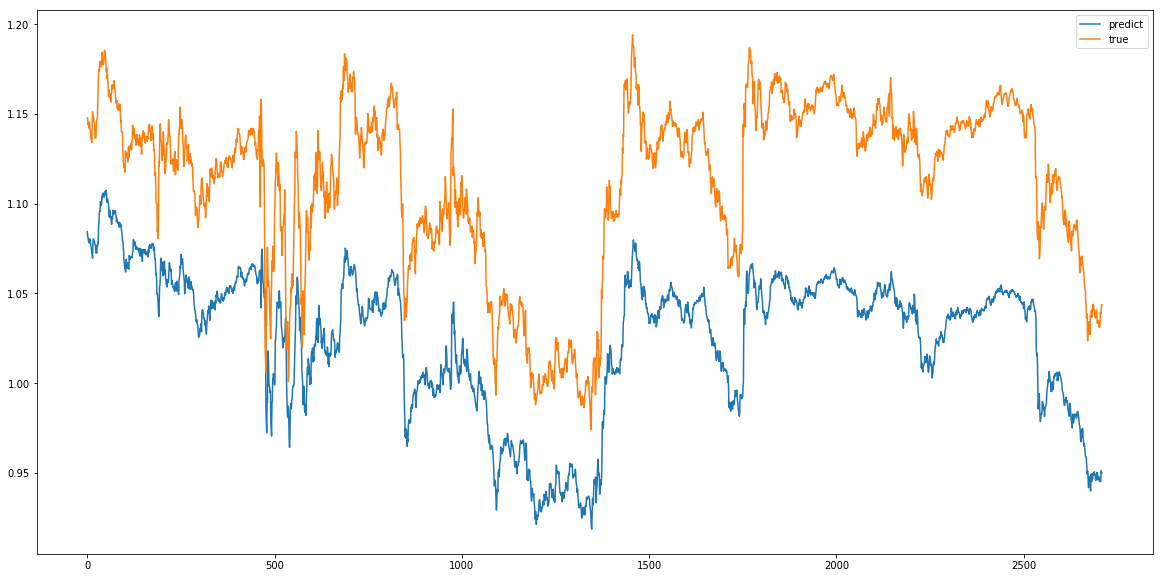

Test RMSE: 0.08937
Test MAE: 0.08755
Test MSE: 0.00799


In [83]:
#saved_weights/nas_lstmcnn_imv_5.hdf5

#150-2-1
from matplotlib import pyplot
from sklearn.metrics import *

yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))


pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')

pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

In [51]:

first_input = Input(shape=(None,20,82))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)

#in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)

in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
n1=Dropout(0.2)
out1=Dense(1, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')


In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 20, 82)]    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 19, 64)      10560     
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 18, 64)      8256      
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 9, 64)       0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 576)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                125400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510 

In [38]:
history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 3508 samples, validate on 271 samples
Epoch 1/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.1491
Epoch 00001: val_loss improved from 0.52472 to 0.16318, saving model to saved_weights/nas_lstmcnn_imv_5.hdf5
3508/3508 [==============================] - 2s 599us/sample - loss: 0.1484 - val_loss: 0.1632
Epoch 2/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.1184
Epoch 00002: val_loss improved from 0.16318 to 0.16074, saving model to saved_weights/nas_lstmcnn_imv_5.hdf5
3508/3508 [==============================] - 1s 214us/sample - loss: 0.1181 - val_loss: 0.1607
Epoch 3/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.1171
Epoch 00003: val_loss improved from 0.16074 to 0.16002, saving model to saved_weights/nas_lstmcnn_imv_5.hdf5
3508/3508 [==============================] - 1s 213us/sample - loss: 0.1171 - val_loss: 0.1600
Epoch 4/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.1169
Epoch 00004: val_loss

3400/3508 [============================>.] - ETA: 0s - loss: 0.0392
Epoch 00034: val_loss did not improve from 0.05393
3508/3508 [==============================] - 1s 206us/sample - loss: 0.0391 - val_loss: 0.0549
Epoch 35/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0390
Epoch 00035: val_loss did not improve from 0.05393
3508/3508 [==============================] - 1s 204us/sample - loss: 0.0390 - val_loss: 0.0543
Epoch 36/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0390
Epoch 00036: val_loss did not improve from 0.05393
3508/3508 [==============================] - 1s 207us/sample - loss: 0.0391 - val_loss: 0.0552
Epoch 37/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0389
Epoch 00037: val_loss did not improve from 0.05393
3508/3508 [==============================] - 1s 207us/sample - loss: 0.0389 - val_loss: 0.0552
Epoch 38/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0390
Epoch 00038: val_loss di

Epoch 70/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0389
Epoch 00070: val_loss did not improve from 0.05346
3508/3508 [==============================] - 1s 208us/sample - loss: 0.0388 - val_loss: 0.0543
Epoch 71/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0388
Epoch 00071: val_loss did not improve from 0.05346
3508/3508 [==============================] - 1s 209us/sample - loss: 0.0388 - val_loss: 0.0547
Epoch 72/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0387
Epoch 00072: val_loss did not improve from 0.05346
3508/3508 [==============================] - 1s 208us/sample - loss: 0.0388 - val_loss: 0.0535
Epoch 73/100
3400/3508 [============================>.] - ETA: 0s - loss: 0.0389
Epoch 00073: val_loss improved from 0.05346 to 0.05320, saving model to saved_weights/nas_lstmcnn_imv_5.hdf5
3508/3508 [==============================] - 1s 213us/sample - loss: 0.0388 - val_loss: 0.0532
Epoch 74/100
3400/3508 [==========

In [39]:
model.load_weights("saved_weights/nas_lstmcnn_imv_5.hdf5")

In [46]:
yhat.shape

(271, 10)

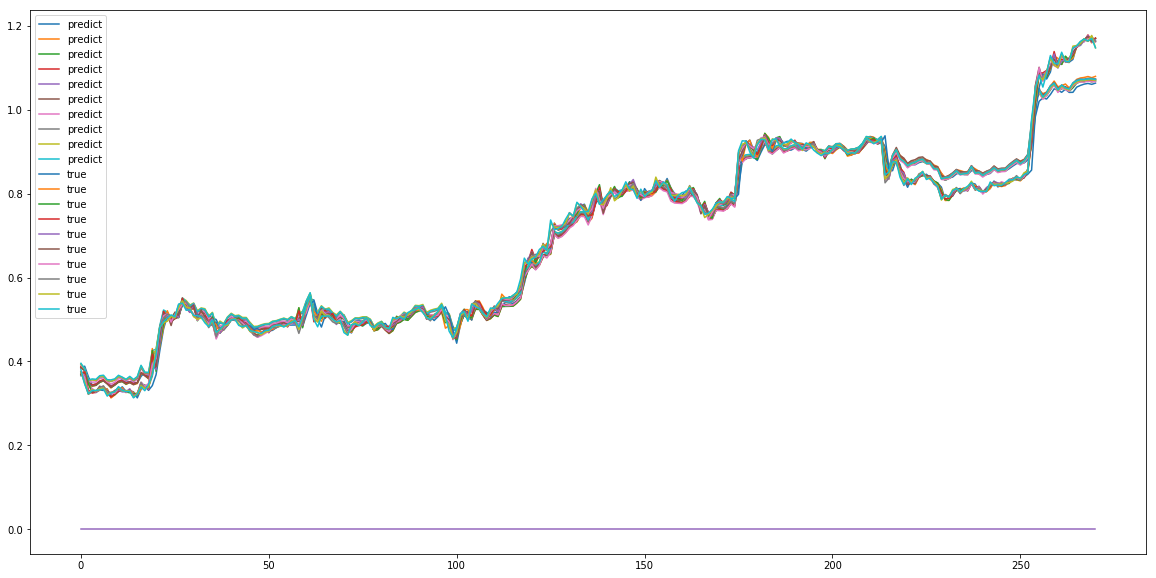

In [49]:
from matplotlib import pyplot
yhat = model.predict([valX])
#yhat=yhat.reshape(-1,10)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(valY, label='true')
pyplot.legend()
pyplot.show()

In [50]:

from math import *
rmse = sqrt(mean_squared_error(valY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.23052


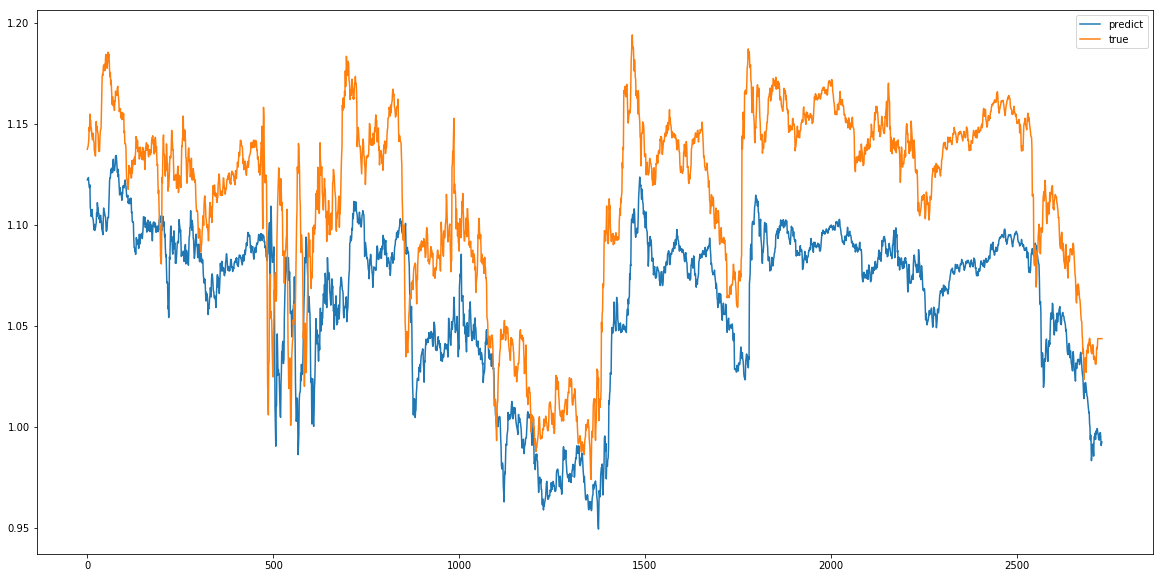

Test RMSE: 0.05545
Test MAE: 0.05072
Test MSE: 0.00307


In [48]:
from matplotlib import pyplot
from sklearn.metrics import *

yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))


pyplot.plot(yhat, label='predict')
pyplot.plot(target_test, label='true')

pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(target_test, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(target_test, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(target_test, yhat)
print('Test MSE: %.5f' % mse)


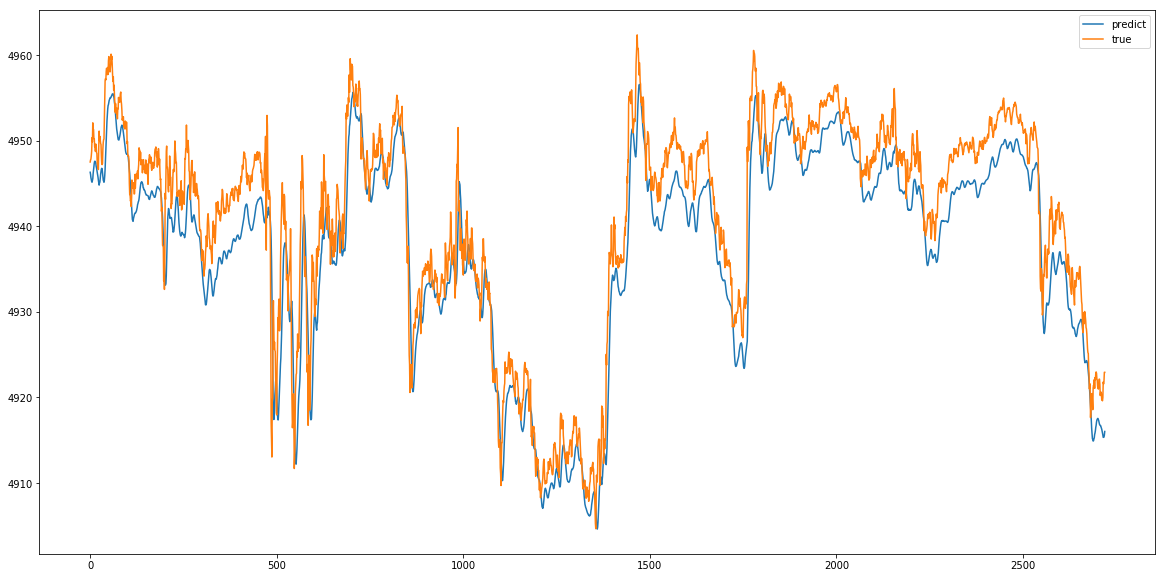

Test RMSE: 4.72999
Test MAE: 3.95179
Test MSE: 22.37284


In [208]:
from matplotlib import pyplot
from sklearn.metrics import *

yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')

pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)



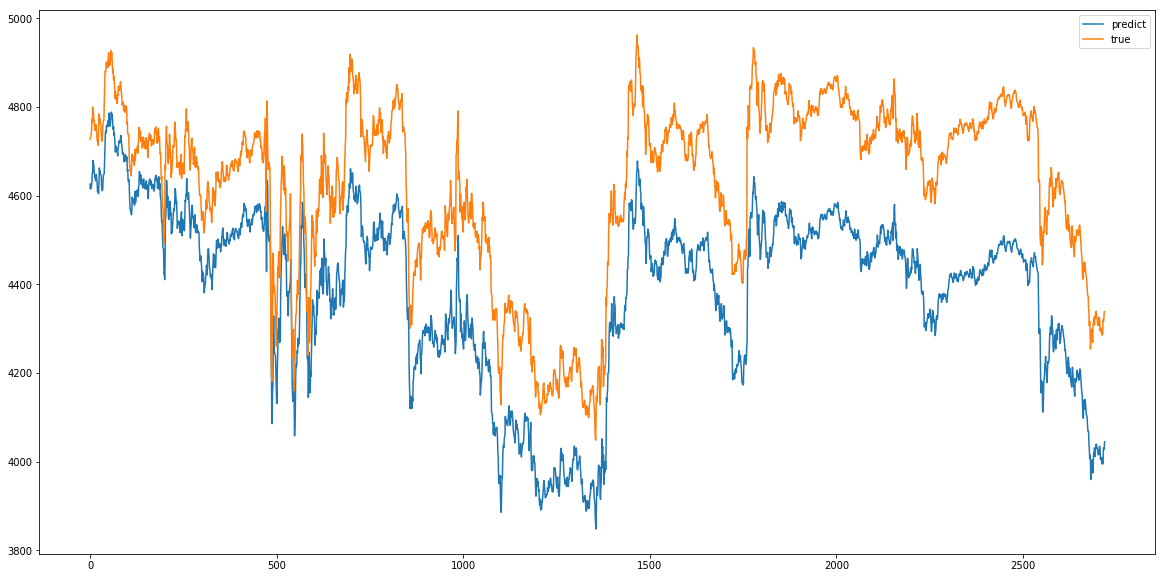

In [121]:

plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='true')

pyplot.legend()
pyplot.show()

### attention cnn, cnn, rescnn 순서

In [45]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 2.78804


In [49]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 5.21353


In [35]:
from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.01849


In [86]:
from tensorflow.keras.models import Model


def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

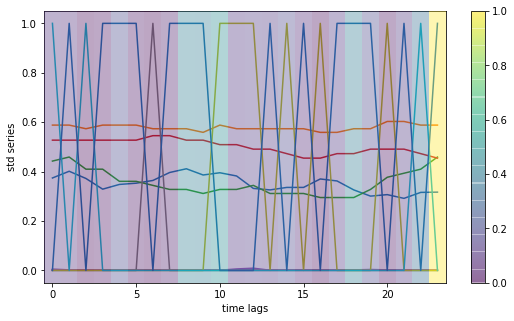

In [107]:
from scipy.ndimage import zoom
import random
id_=random.randint(0,len(testX))


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)

plt.figure(figsize=(9,5))
plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('std series'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*30), alpha=0.35)
plt.axis('off'); plt.colorbar()
np.set_printoptions(False)

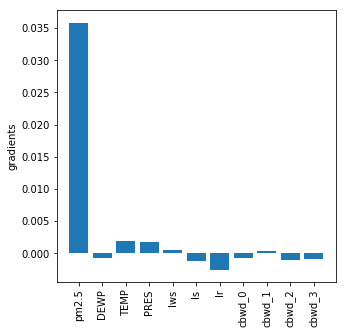

In [106]:
columns=data.columns[5:]

grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(5,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)